## Use Case
Building a machine learning model to accurately predict if patient have diabetes

## **Dataset details:**
- **Gender**: gender
- **Age**: age
- **Hypertension**: hypertension
- **Heart Disease**: heart_disease
- **Smoking History**: smoking_history
- **BMI**: bmi
- **Average Blood Glucose levels**: HbA1c_level
- **Blood Glucose Level**: blood_glucose_level
- **Outcome**: diabetes

# 1) Exploratory Data Analysis

In [23]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, MinMaxScaler, StandardScaler

import pandas as pd
import warnings
warnings.simplefilter(action = "ignore") 

In [3]:
# Load the new dataset
csv_file_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(csv_file_path)

# Renaming columns to match the new dataset structure
df.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'hypertension': 'Hypertension',
    'heart_disease': 'Heart_Disease',
    'smoking_history': 'Smoking_History',
    'bmi': 'BMI',
    'HbA1c_level': 'HbA1c_Level',
    'blood_glucose_level': 'Blood_Glucose_Level',
    'diabetes': 'Outcome'
}, inplace=True)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               100000 non-null  object 
 1   Age                  100000 non-null  float64
 2   Hypertension         100000 non-null  int64  
 3   Heart_Disease        100000 non-null  int64  
 4   Smoking_History      100000 non-null  object 
 5   BMI                  100000 non-null  float64
 6   HbA1c_Level          100000 non-null  float64
 7   Blood_Glucose_Level  100000 non-null  int64  
 8   Outcome              100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# The first 5 observation units of the data set were accessed.
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(100000, 9)

In [6]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               100000 non-null  object 
 1   Age                  100000 non-null  float64
 2   Hypertension         100000 non-null  int64  
 3   Heart_Disease        100000 non-null  int64  
 4   Smoking_History      100000 non-null  object 
 5   BMI                  100000 non-null  float64
 6   HbA1c_Level          100000 non-null  float64
 7   Blood_Glucose_Level  100000 non-null  int64  
 8   Outcome              100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Age,100000.0,41.885856,22.516840,0.08,10.00,24.00,43.00,60.00,73.00,80.00,80.0000,80.00
Hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0000,1.00
Heart_Disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,1.00
BMI,100000.0,27.320767,6.636783,10.01,19.18,23.63,27.32,29.58,35.47,39.49,48.7901,95.69
HbA1c_Level,100000.0,5.527507,1.070672,3.50,4.00,4.80,5.80,6.20,6.60,6.60,8.8000,9.00
Blood_Glucose_Level,100000.0,138.058060,40.708136,80.00,85.00,100.00,140.00,159.00,200.00,200.00,280.0000,300.00
Outcome,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0000,1.00


In [8]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    91.5
1     8.5
Name: count, dtype: float64

In [9]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

Outcome
0    91500
1     8500
Name: count, dtype: int64

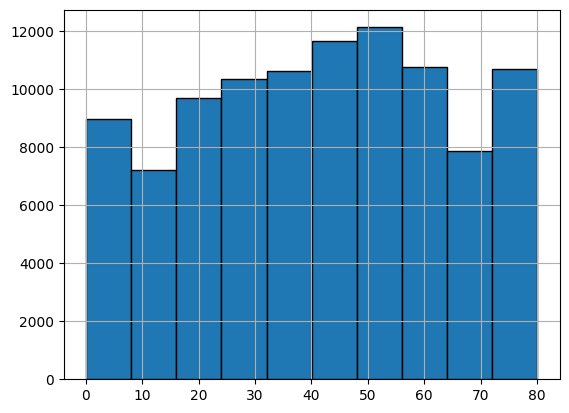

In [10]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [11]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 80.0 Min Age: 0.08


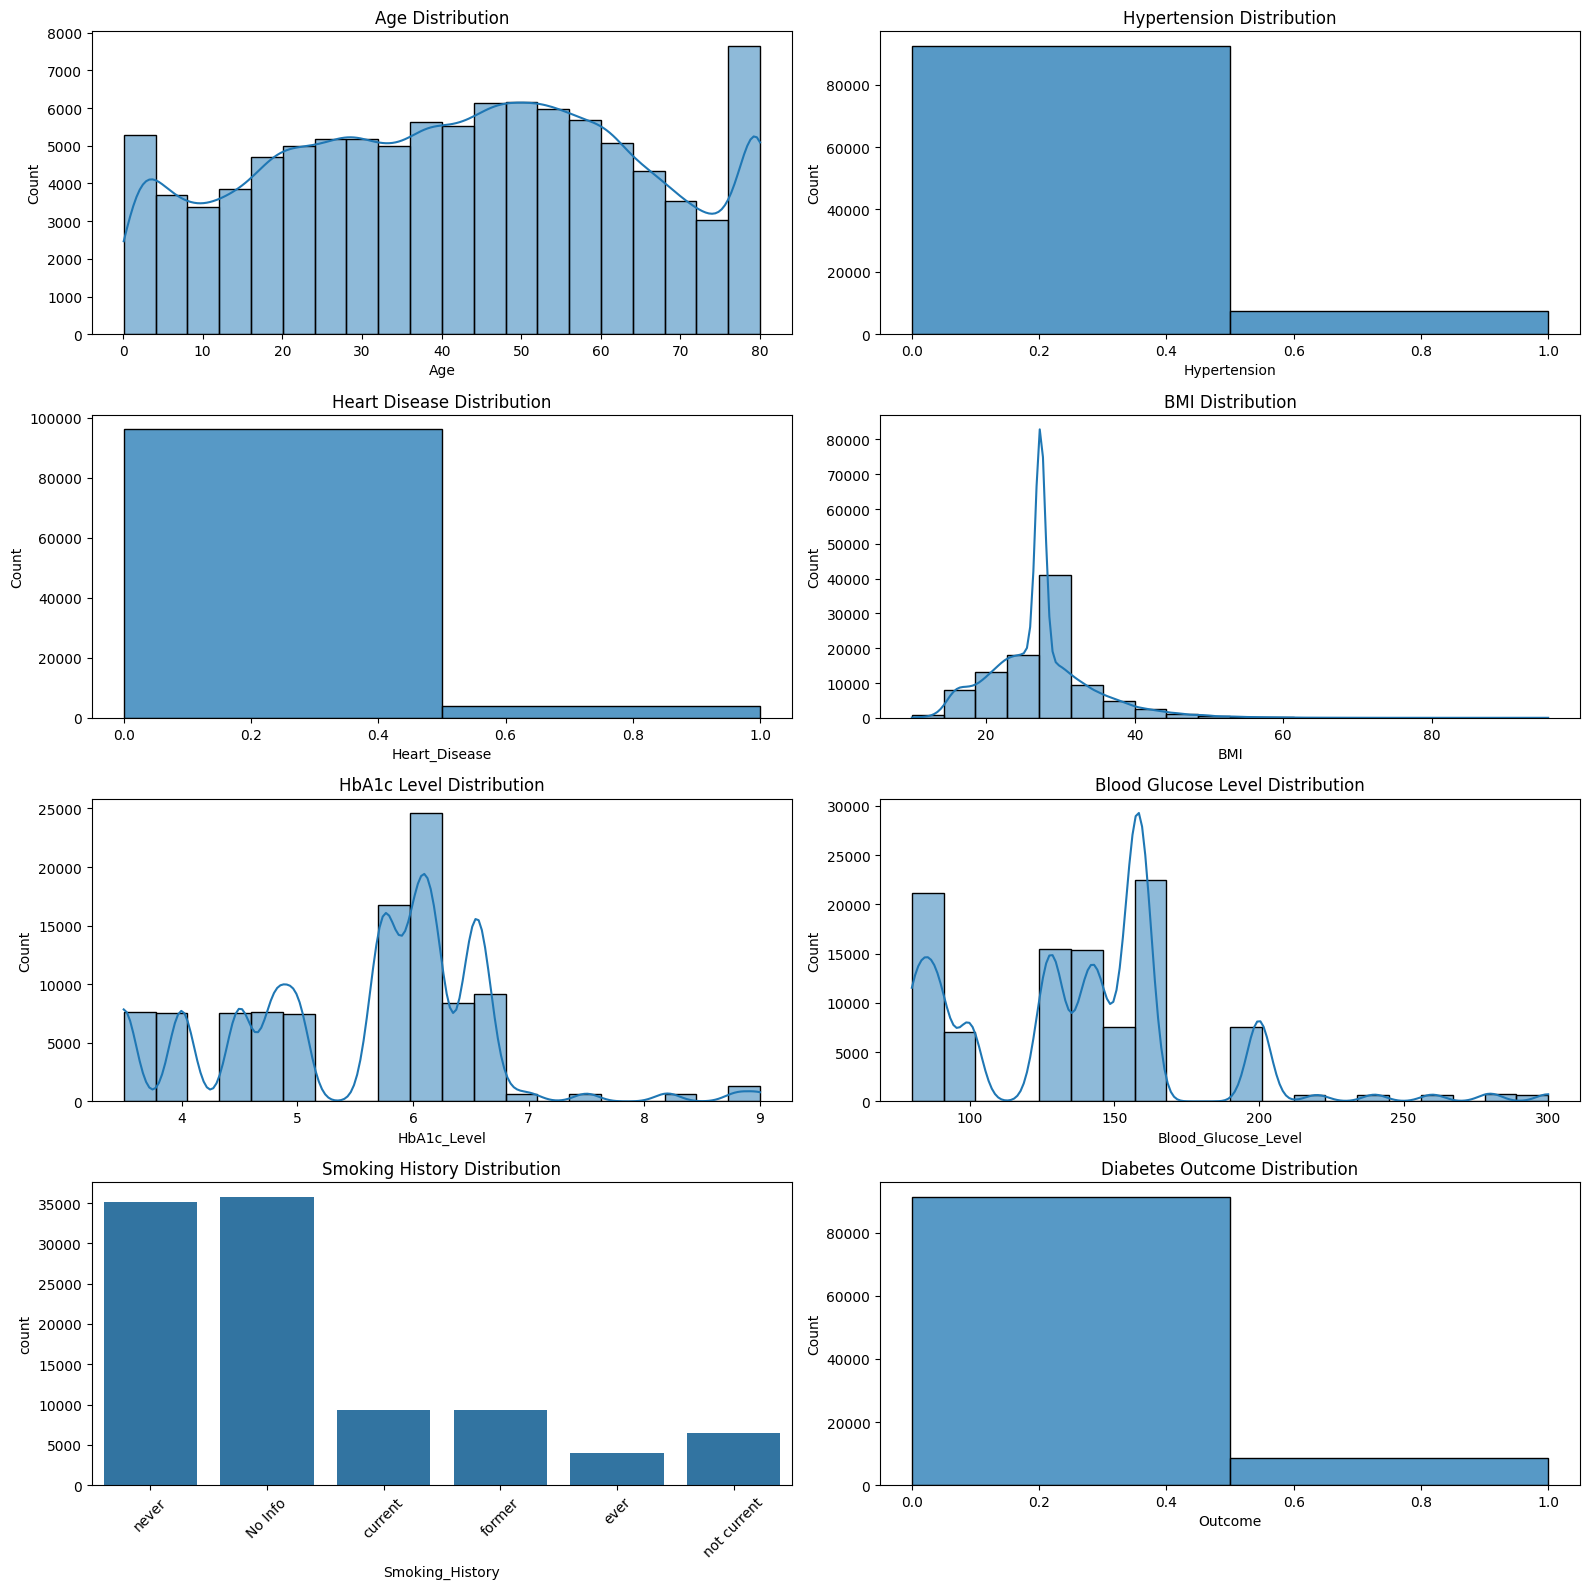

In [12]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Age, bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")

sns.histplot(df.Hypertension, bins=2, kde=False, ax=ax[0, 1])
ax[0, 1].set_title("Hypertension Distribution")

sns.histplot(df.Heart_Disease, bins=2, kde=False, ax=ax[1, 0])
ax[1, 0].set_title("Heart Disease Distribution")

sns.histplot(df.BMI, bins=20, kde=True, ax=ax[1, 1])
ax[1, 1].set_title("BMI Distribution")

sns.histplot(df.HbA1c_Level, bins=20, kde=True, ax=ax[2, 0])
ax[2, 0].set_title("HbA1c Level Distribution")

sns.histplot(df.Blood_Glucose_Level, bins=20, kde=True, ax=ax[2, 1])
ax[2, 1].set_title("Blood Glucose Level Distribution")

sns.countplot(x=df.Smoking_History, ax=ax[3, 0])
ax[3, 0].set_title("Smoking History Distribution")
ax[3, 0].set_xticklabels(ax[3, 0].get_xticklabels(), rotation=45)

sns.histplot(df.Outcome, bins=2, kde=False, ax=ax[3, 1])
ax[3, 1].set_title("Diabetes Outcome Distribution")

plt.tight_layout()
plt.show()

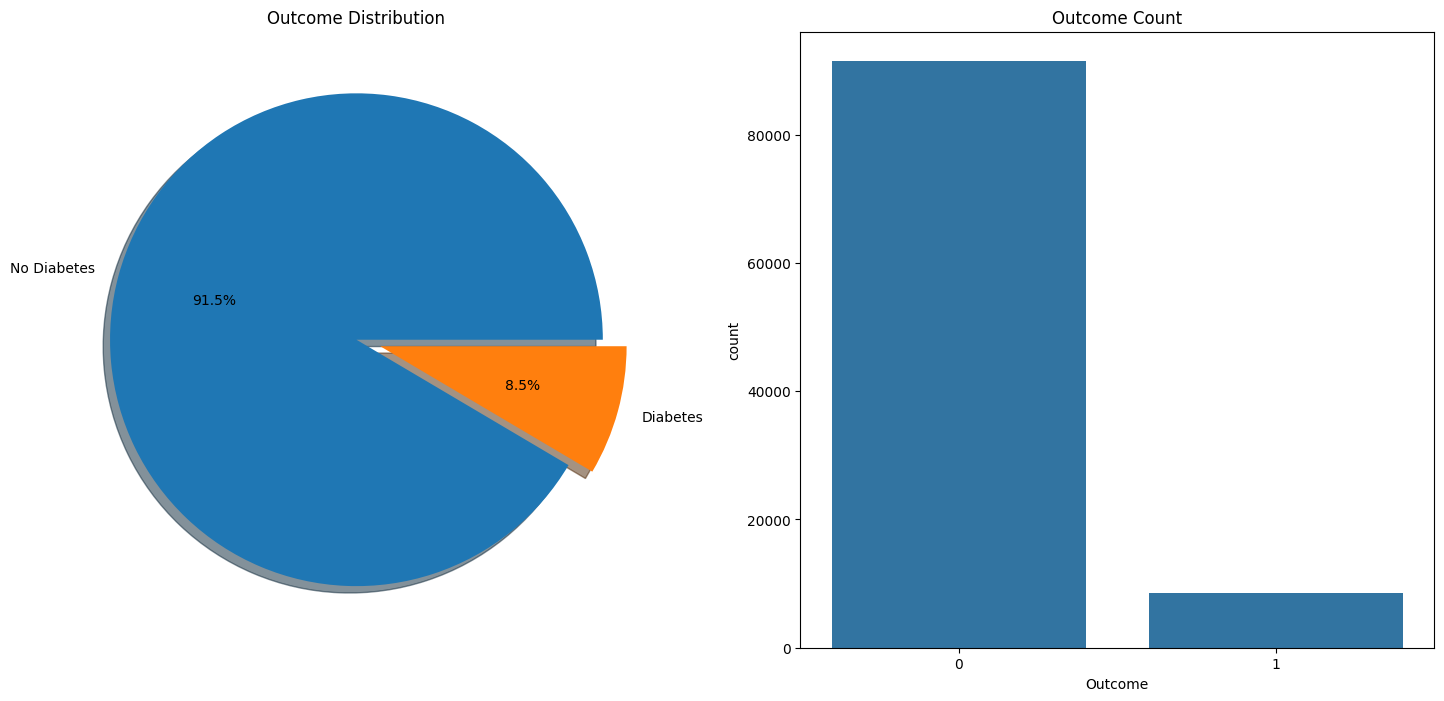

In [13]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, labels=['No Diabetes', 'Diabetes']
)
ax[0].set_title('Outcome Distribution')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])  # Corrected the x argument
ax[1].set_title('Outcome Count')

plt.show()

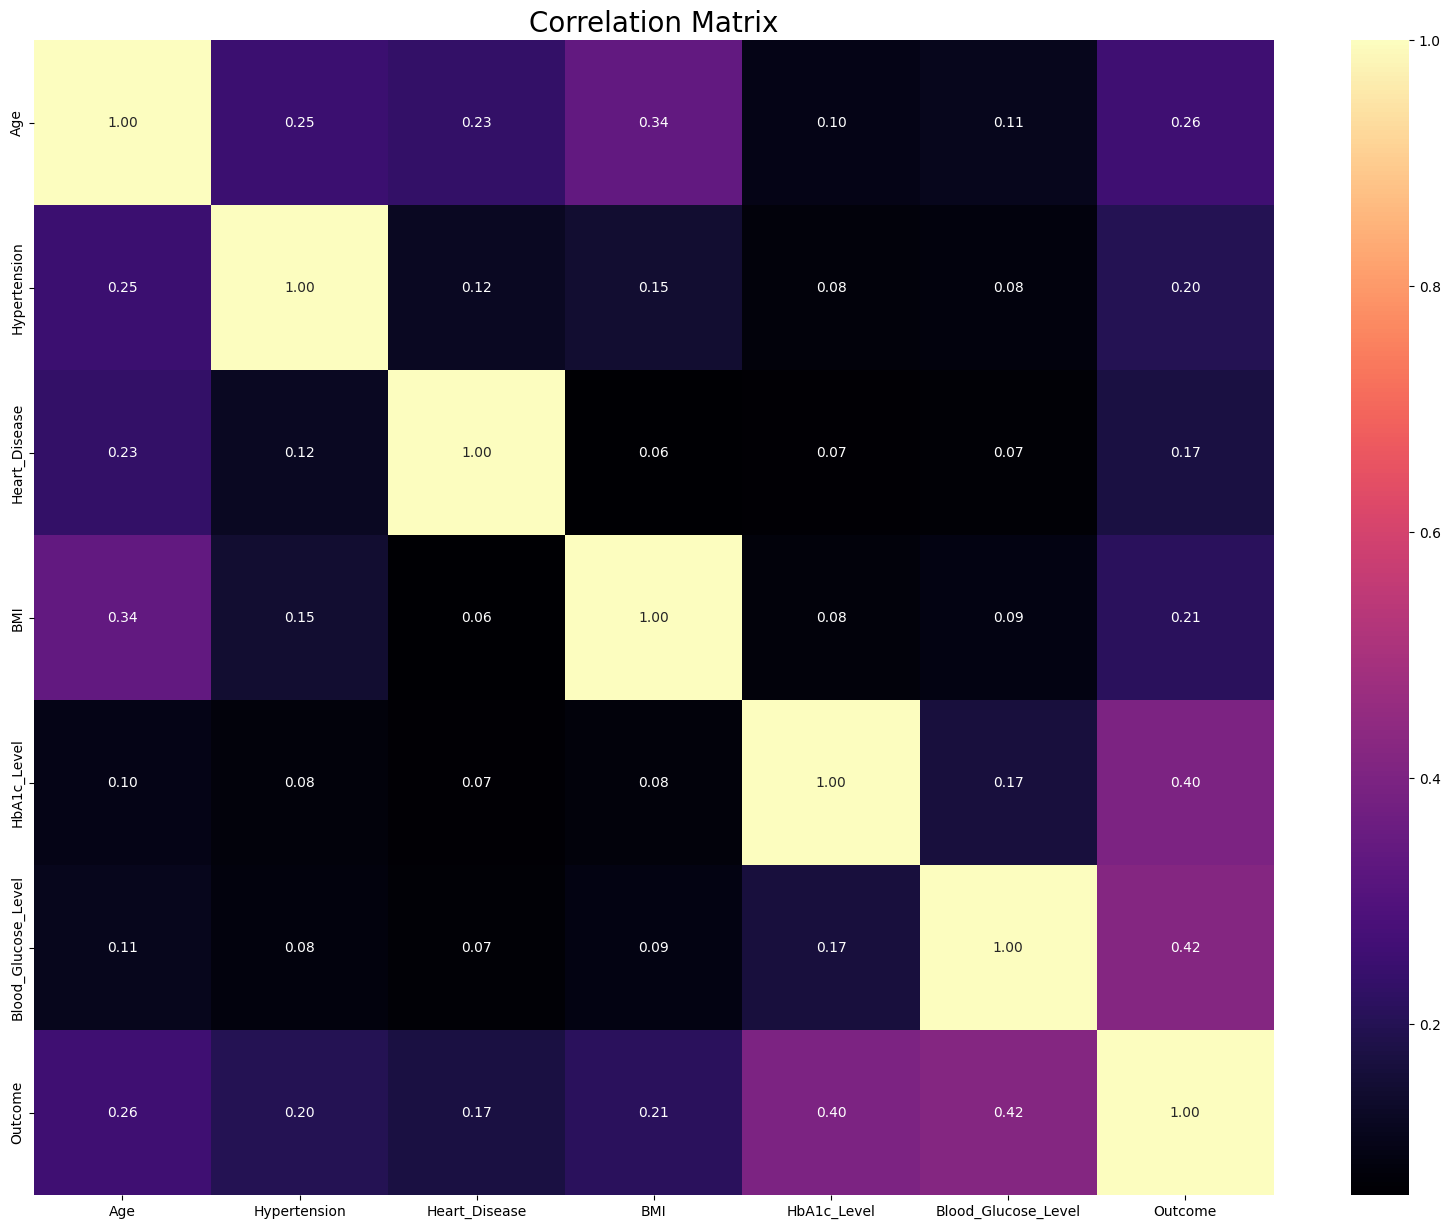

In [14]:
# Correlation matrix graph of the data set
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix heatmap
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)

plt.show()

# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We notice that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [15]:
df[['BMI', 'Blood_Glucose_Level', 'HbA1c_Level']] = df[['BMI', 'Blood_Glucose_Level', 'HbA1c_Level']].replace(0, np.nan)
# Check for missing values
df.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Smoking_History        0
BMI                    0
HbA1c_Level            0
Blood_Glucose_Level    0
Outcome                0
dtype: int64

## 2.2) Outlier Observation Analysis

BMI yes (Outliers detected)
HbA1c_Level yes (Outliers detected)
Blood_Glucose_Level yes (Outliers detected)


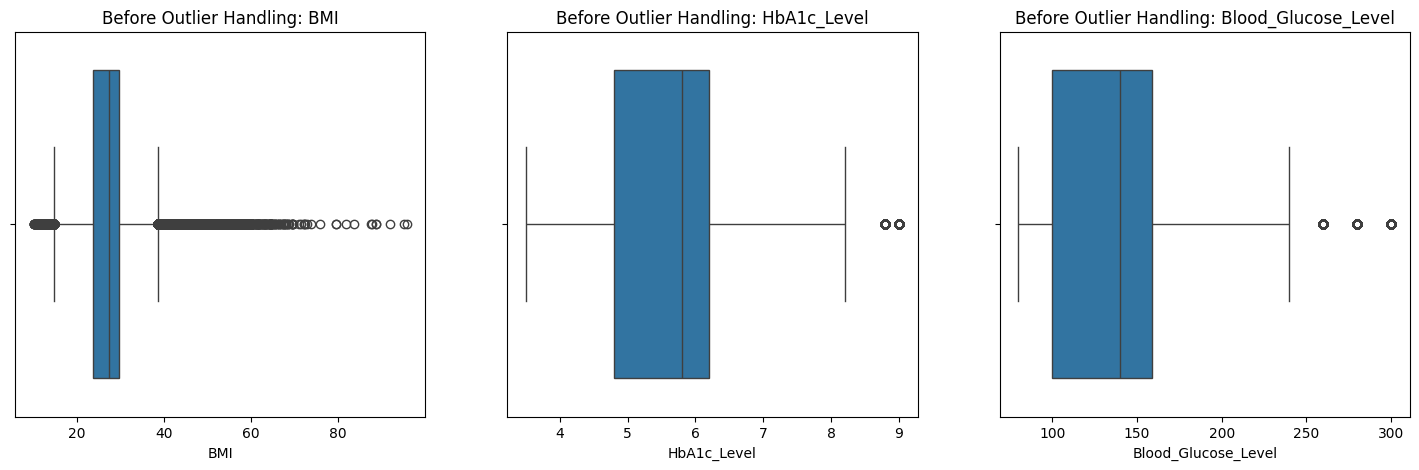

In [16]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# List of features to check for outliers
features_to_check = ['BMI', 'HbA1c_Level', 'Blood_Glucose_Level']
for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Check if any values exceed the upper bound (outliers)
    if (df[feature] > upper).any() or (df[feature] < lower).any():
        print(feature, "yes (Outliers detected)")
    else:
        print(feature, "no (No outliers)")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features_to_check):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Before Outlier Handling: {feature}")
plt.show()

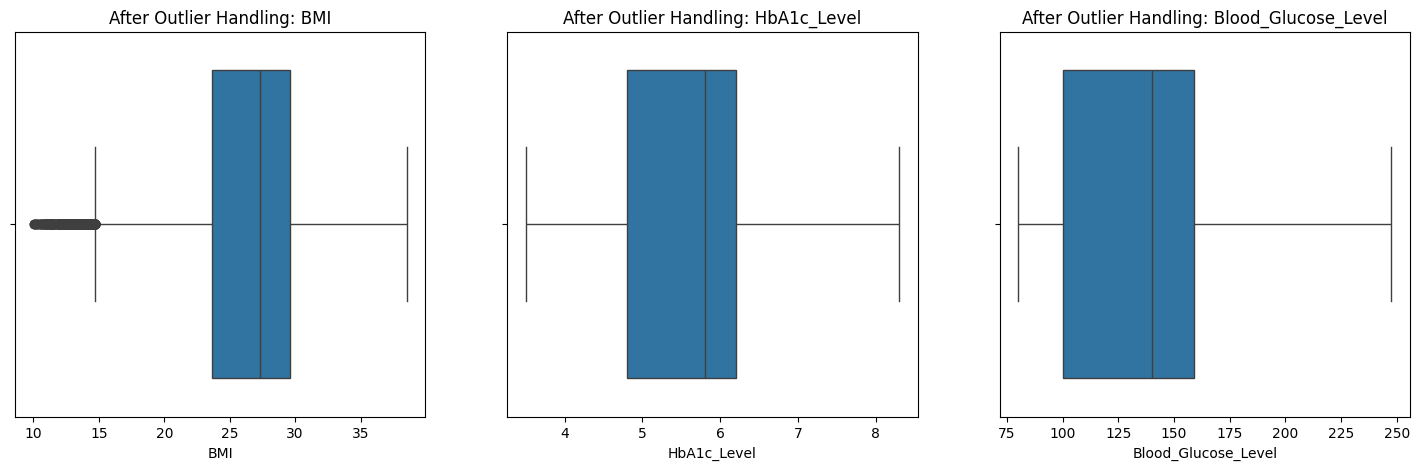

In [17]:
for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR  # We only cap upper outliers
    
    # Replace values above the upper bound with the upper bound
    df.loc[df[feature] > upper, feature] = upper

# Plot after handling outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features_to_check):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"After Outlier Handling: {feature}")
plt.show()

## 2.3)  Local Outlier Factor (LOF) I dont think we need this? can ignore these entire chunk

In [18]:
# We determine outliers between all variables with the LOF method
# from sklearn.neighbors import LocalOutlierFactor
# lof =LocalOutlierFactor(n_neighbors= 10)
# lof.fit_predict(df)

In [19]:
# df_scores = lof.negative_outlier_factor_
# np.sort(df_scores)[0:30]

In [20]:
# #We choose the threshold value according to lof scores
# threshold = np.sort(df_scores)[7]
# threshold

In [21]:
#We delete those that are higher than the threshold
# outlier = df_scores > threshold
# df = df[outlier]

In [22]:
# The size of the data set was examined.
# df.shape

# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [47]:
df_fe = df.copy()

# 1️⃣ **BMI Categorical Mapping**
df_fe["NewBMI"] = "NaN"
df_fe.loc[df_fe["BMI"] < 18.5, "NewBMI"] = "Underweight"
df_fe.loc[(df_fe["BMI"] >= 18.5) & (df_fe["BMI"] <= 24.9), "NewBMI"] = "Normal"
df_fe.loc[(df_fe["BMI"] > 24.9) & (df_fe["BMI"] <= 29.9), "NewBMI"] = "Overweight"
df_fe.loc[(df_fe["BMI"] > 29.9) & (df_fe["BMI"] <= 34.9), "NewBMI"] = "Obesity 1"
df_fe.loc[(df_fe["BMI"] > 34.9) & (df_fe["BMI"] <= 39.9), "NewBMI"] = "Obesity 2"
df_fe.loc[df_fe["BMI"] > 39.9, "NewBMI"] = "Obesity 3"

# 2️⃣ **HbA1c Level Categorical Mapping**
df_fe["NewHbA1cLevel"] = "NaN"
df_fe.loc[df_fe["HbA1c_Level"] < 5.7, "NewHbA1cLevel"] = "Normal"
df_fe.loc[(df_fe["HbA1c_Level"] >= 5.7) & (df_fe["HbA1c_Level"] < 6.5), "NewHbA1cLevel"] = "Prediabetic"
df_fe.loc[df_fe["HbA1c_Level"] >= 6.5, "NewHbA1cLevel"] = "Diabetic"

# 3️⃣ **Blood Glucose Level Categorical Mapping**
df_fe["NewGlucose"] = "NaN"
df_fe.loc[df_fe["Blood_Glucose_Level"] <= 70, "NewGlucose"] = "Low"
df_fe.loc[(df_fe["Blood_Glucose_Level"] > 70) & (df_fe["Blood_Glucose_Level"] <= 99), "NewGlucose"] = "Normal"
df_fe.loc[(df_fe["Blood_Glucose_Level"] > 99) & (df_fe["Blood_Glucose_Level"] <= 126), "NewGlucose"] = "Prediabetic"
df_fe.loc[df_fe["Blood_Glucose_Level"] > 126, "NewGlucose"] = "Diabetic"

# Convert new categorical columns into category type
df_fe["NewBMI"] = df_fe["NewBMI"].astype("category")
df_fe["NewHbA1cLevel"] = df_fe["NewHbA1cLevel"].astype("category")
df_fe["NewGlucose"] = df_fe["NewGlucose"].astype("category")

# Display first few rows
df_fe.head()
print(df_fe.columns)


Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'BMI', 'HbA1c_Level',
       'Blood_Glucose_Level', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewHbA1cLevel_Normal', 'NewHbA1cLevel_Prediabetic',
       'NewGlucose_Normal', 'NewGlucose_Prediabetic',
       'Smoking_History_current', 'Smoking_History_ever',
       'Smoking_History_former', 'Smoking_History_never',
       'Smoking_History_not current', 'NewBMI', 'NewHbA1cLevel', 'NewGlucose'],
      dtype='object')


# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [42]:
# List of categorical columns that need encoding
categorical_columns = ["NewBMI", "NewHbA1cLevel", "NewGlucose"]

# Ensure we only encode if original categorical columns exist (to prevent duplicates)
existing_columns = df_fe.columns
columns_to_encode = [col for col in categorical_columns if col in existing_columns]

# Apply one-hot encoding only on non-encoded columns
df_encoded = pd.get_dummies(df_fe, columns=columns_to_encode, drop_first=True)

df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]

# Display column names to verify no duplicates
print(df_encoded)

       Gender  Age  Hypertension  Heart_Disease  BMI  HbA1c_Level  \
0           0   80             0              1   25            6   
1           0   54             0              0   27            6   
2           1   28             0              0   27            5   
3           0   36             0              0   23            5   
4           1   76             1              1   20            4   
...       ...  ...           ...            ...  ...          ...   
99995       0   80             0              0   27            6   
99996       0    2             0              0   17            6   
99997       1   66             0              0   27            5   
99998       0   24             0              0   35            4   
99999       0   57             0              0   22            6   

       Blood_Glucose_Level  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  ...  \
0                      140        0                 0                 0  ...   
1          

## Testing Interaction features 

In [45]:
# Comorbidity Score: Combining hypertension and heart disease
df_encoded["Comorbidity_Score"] = df_encoded["Hypertension"] + df_encoded["Heart_Disease"]

# BMI-to-Age Ratio
df_encoded["Bmi_Age_Ratio"] = df_encoded["BMI"] / df_encoded["Age"]

# Glucose Control Index (HbA1c * Blood Glucose Level)
df_encoded["Glucose_Control_Index"] = df_encoded["HbA1c_Level"] * df_encoded["Blood_Glucose_Level"]

# Display first few rows
df_encoded.head()
print(df_encoded)

       Gender  Age  Hypertension  Heart_Disease  BMI  HbA1c_Level  \
0           0   80             0              1   25            6   
1           0   54             0              0   27            6   
2           1   28             0              0   27            5   
3           0   36             0              0   23            5   
4           1   76             1              1   20            4   
...       ...  ...           ...            ...  ...          ...   
99995       0   80             0              0   27            6   
99996       0    2             0              0   17            6   
99997       1   66             0              0   27            5   
99998       0   24             0              0   35            4   
99999       0   57             0              0   22            6   

       Blood_Glucose_Level  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  ...  \
0                      140        0                 0                 0  ...   
1          

## Testing polynomial features 

In [46]:
# Select features for polynomial transformation
poly_features = ["Age", "BMI", "HbA1c_Level", "Blood_Glucose_Level"]
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Transform data
poly_transformed = poly.fit_transform(df_encoded[poly_features])

# Convert to DataFrame and rename columns
poly_columns = poly.get_feature_names_out(poly_features)
df_poly = pd.DataFrame(poly_transformed, columns=poly_columns, index=df_encoded.index)

# Concatenate with main dataframe
df_encoded = pd.concat([df_encoded, df_poly], axis=1)

# Display first few rows
df_encoded.head()
print(df_encoded)

       Gender  Age  Hypertension  Heart_Disease  BMI  HbA1c_Level  \
0           0   80             0              1   25            6   
1           0   54             0              0   27            6   
2           1   28             0              0   27            5   
3           0   36             0              0   23            5   
4           1   76             1              1   20            4   
...       ...  ...           ...            ...  ...          ...   
99995       0   80             0              0   27            6   
99996       0    2             0              0   17            6   
99997       1   66             0              0   27            5   
99998       0   24             0              0   35            4   
99999       0   57             0              0   22            6   

       Blood_Glucose_Level  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  ...  \
0                      140        0                 0                 0  ...   
1          

In [20]:
y = df["Outcome"]
print(df.columns)
X = df.drop(["Outcome", "NewHbA1cLevel_Normal", "NewGlucose_Normal"], axis=1)
cols = X.columns
index = X.index
X.head()

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'BMI', 'HbA1c_Level',
       'Blood_Glucose_Level', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewHbA1cLevel_Normal', 'NewHbA1cLevel_Prediabetic',
       'NewGlucose_Normal', 'NewGlucose_Prediabetic',
       'Smoking_History_current', 'Smoking_History_ever',
       'Smoking_History_former', 'Smoking_History_never',
       'Smoking_History_not current'],
      dtype='object')


,Gender,Age,Hypertension,Heart_Disease,BMI,HbA1c_Level,Blood_Glucose_Level,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Overweight,NewBMI_Underweight,NewHbA1cLevel_Prediabetic,NewGlucose_Prediabetic,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,0,80,0,1,25,6,140,0,0,1,0,0,0,0,0,0,1,0
1,0,54,0,0,27,6,80,0,0,1,0,0,0,0,0,0,0,0
2,1,28,0,0,27,5,158,0,0,1,0,1,0,0,0,0,1,0
3,0,36,0,0,23,5,155,0,0,0,0,0,0,1,0,0,0,0
4,1,76,1,1,20,4,155,0,0,0,0,0,0,1,0,0,0,0


In [9]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)
X.head()

,Gender,Age,Hypertension,Heart_Disease,BMI,HbA1c_Level,Blood_Glucose_Level,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Overweight,NewBMI_Underweight,NewHbA1cLevel_Prediabetic,NewGlucose_Prediabetic,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,0.0,1.027778,0.0,1.0,-0.333333,0.5,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.305556,0.0,0.0,0.000000,0.5,-1.016949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.416667,0.0,0.0,0.000000,0.0,0.305085,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.194444,0.0,0.0,-0.666667,0.0,0.254237,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.916667,1.0,1.0,-1.166667,-0.5,0.254237,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

### Splitting Data into 3 Sets (Train, Test, Dev)

Train set shape: (70000, 20), (70000,)
Development set shape: (15000, 20), (15000,)
Test set shape: (15000, 20), (15000,)


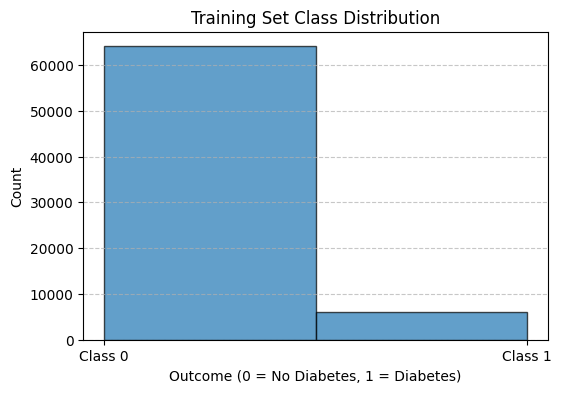

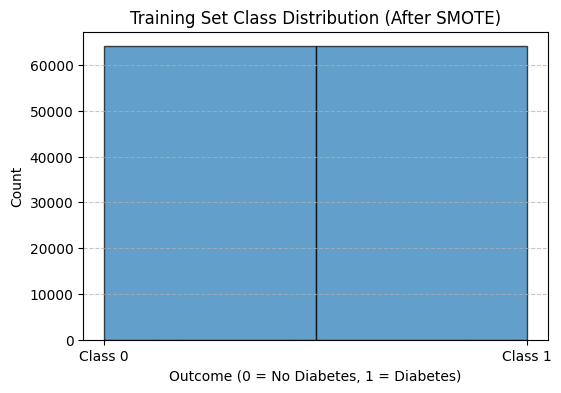

In [11]:
from imblearn.over_sampling import SMOTE

# print(df.columns)

# Separate features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# First, split into training (70%) and remaining (30%)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then, split the remaining into development (15%) and test (15%)
X_dev, X_test, y_dev, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Print dataset shapes
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Development set shape: {X_dev.shape}, {y_dev.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Plot Class Distribution Before SMOTE
def plot_class_distribution(y_data, title):
    plt.figure(figsize=(6,4))
    plt.hist(y_data, bins=2, edgecolor='black', alpha=0.7)
    plt.xticks([0,1], labels=['Class 0', 'Class 1'])
    plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
    plt.ylabel("Count")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot BEFORE applying SMOTE
plot_class_distribution(y_train, "Training Set Class Distribution")
# plot_class_distribution(y_dev, "Development Set Class Distribution")
# plot_class_distribution(y_test, "Test Set Class Distribution")

# Apply SMOTE (Only on Training Set)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Plot AFTER applying SMOTE
plot_class_distribution(y_train_smote, "Training Set Class Distribution (After SMOTE)")


Feature Scaling (StandardScaler)

In [12]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training set only
# scaler.fit(X_train)

# Fit scaler on training set only (after SMOTE)
scaler.fit(X_train_smote)

# Apply transformation to all sets
# X_train_scaled = scaler.transform(X_train)
X_train_scaled = scaler.transform(X_train_smote)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (preserve column names)
# X_train = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train_smote.index)
X_dev = pd.DataFrame(X_dev_scaled, columns=X.columns, index=X_dev.index)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# print("\nProcessed Train Data Sample:")
# print(X_train.head())
# print(y_train.head())

# 5) Base Models

In [ ]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
# models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
smote_train_results = []
test_results = []
classification_reports = {}
names = []

Accuracy Scores for SMOTE Train Set and Test Set

In [ ]:
for name, model in models:
    # Cross-validation on SMOTE Training Set
    cv_results_train = cross_val_score(model, X_train_smote, y_train_smote, cv= 5, scoring="accuracy")
    smote_train_results.append(cv_results_train)

    # Train on the SMOTE Training Set
    model.fit(X_train_smote, y_train_smote)

    # Evaluate on the Test Set
    test_score = model.score(X_test, y_test)
    test_results.append(test_score)

    # Store names
    names.append(name)

    # Print results
    msg = f"{name}: SMOTE Train Accuracy = {cv_results_train.mean()*100:.2f}%, Std Dev = {cv_results_train.std()*100:.2f}% | Test Accuracy = {test_score*100:.2f}%"
    print(msg)


Trying to add Accuracy & Balanced Accuracy for Pre-smote, Smote and Test

In [16]:
# Check dataset sizes before and after SMOTE
print(f"📌 X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"📌 X_train_smote shape: {X_train_smote.shape}, y_train_smote shape: {y_train_smote.shape}")

# Initialize result storage
full_results = []

print("\n🚀 **Model Evaluation Results Before & After SMOTE (Train & Test)** 🚀\n")

# Evaluate each model before and after SMOTE
for name, model in models:
    # ✅ Compute cross-validation accuracy on Pre-SMOTE & Post-SMOTE Training Set
    pre_smote_cv_results_train = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    post_smote_cv_results_train = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")

    # ✅ Train on original (Pre-SMOTE) training set
    model_pre = model  # Create separate instances to avoid overwriting
    model_pre.fit(X_train, y_train)
    y_train_pred_pre = model_pre.predict(X_train)
    y_test_pred_pre = model_pre.predict(X_test)

    # ✅ Train on SMOTE-balanced training set
    model_post = model
    model_post.fit(X_train_smote, y_train_smote)
    y_train_pred_post = model_post.predict(X_train_smote)
    y_test_pred_post = model_post.predict(X_test)

    # ✅ Compute accuracy and balanced accuracy before and after SMOTE
    model_results = {
        "Model": name,
        "Train Accuracy (Pre-SMOTE)": accuracy_score(y_train, y_train_pred_pre),
        "Test Accuracy (Pre-SMOTE)": accuracy_score(y_test, y_test_pred_pre),
        "Train Balanced Accuracy (Pre-SMOTE)": balanced_accuracy_score(y_train, y_train_pred_pre),
        "Test Balanced Accuracy (Pre-SMOTE)": balanced_accuracy_score(y_test, y_test_pred_pre),
        "Train Accuracy (Post-SMOTE)": accuracy_score(y_train_smote, y_train_pred_post),
        "Test Accuracy (Post-SMOTE)": accuracy_score(y_test, y_test_pred_post),
        "Train Balanced Accuracy (Post-SMOTE)": balanced_accuracy_score(y_train_smote, y_train_pred_post),
        "Test Balanced Accuracy (Post-SMOTE)": balanced_accuracy_score(y_test, y_test_pred_post),
        "Cross-Val Accuracy (Pre-SMOTE Train)": pre_smote_cv_results_train.mean(),
        "Cross-Val Accuracy (Post-SMOTE Train)": post_smote_cv_results_train.mean(),
    }

    # ✅ Store names
    names.append(name)

    # ✅ Print results in a structured format
    msg = (
        f"{name}: \n"
        f"   ✅ Pre-SMOTE Train Accuracy = {pre_smote_cv_results_train.mean()*100:.2f}%, "
        f"Std Dev = {pre_smote_cv_results_train.std()*100:.2f}%\n"
        f"   ✅ Post-SMOTE Train Accuracy = {post_smote_cv_results_train.mean()*100:.2f}%, "
        f"Std Dev = {post_smote_cv_results_train.std()*100:.2f}%\n"
        f"   ✅ Test Accuracy = {model_results['Test Accuracy (Post-SMOTE)']*100:.2f}%"
    )
    print(msg)

    # ✅ Append results to list
    full_results.append(model_results)

# Convert results to DataFrame for better readability
df_results = pd.DataFrame(full_results)

# ========================== #
# Display Results in Table   #
# ========================== #

# Define column names (headers)
header_list = ["Metric", "Pre-SMOTE Train", "Pre-SMOTE Test", "Post-SMOTE Train (Cross-Val)", "Post-SMOTE Test"]

# Accuracy Results
accuracy_list = [
    "Accuracy",
    df_results["Train Accuracy (Pre-SMOTE)"].mean(),
    df_results["Test Accuracy (Pre-SMOTE)"].mean(),
    df_results["Cross-Val Accuracy (Post-SMOTE Train)"].mean(),
    df_results["Test Accuracy (Post-SMOTE)"].mean(),
]

# Balanced Accuracy Results
balanced_accuracy_list = [
    "Balanced Accuracy",
    df_results["Train Balanced Accuracy (Pre-SMOTE)"].mean(),
    df_results["Test Balanced Accuracy (Pre-SMOTE)"].mean(),
    df_results["Train Balanced Accuracy (Post-SMOTE)"].mean(),
    df_results["Test Balanced Accuracy (Post-SMOTE)"].mean(),
]

# Combine all results into a table
full_list = [accuracy_list, balanced_accuracy_list]

# Create DataFrame
df_summary = pd.DataFrame(full_list, columns=header_list)

# ✅ Display the final performance table
print("\n📊 **Summary of Accuracy & Balanced Accuracy Scores** 📊")
print(df_summary)

# ✅ Also print the full detailed model performance results
print("\n📊 **Detailed Model Performance Before & After SMOTE** 📊")
print(df_results)

📌 X_train shape: (128100, 20), y_train shape: (70000,)
📌 X_train_smote shape: (128100, 20), y_train_smote shape: (128100,)

🚀 **Model Evaluation Results Before & After SMOTE (Train & Test)** 🚀



ValueError: Found input variables with inconsistent numbers of samples: [128100, 70000]

Model Performance Boxplot for SMOTE Train Set and Test Set

In [ ]:
# Create side-by-side boxplots for Training and Test sets
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training Set Performance
axes[0].boxplot(smote_train_results)
axes[0].set_title('Training Set - Algorithm Comparison')
axes[0].set_xticklabels(names)
axes[0].set_ylabel("Accuracy")

# Test Set Performance
axes[1].bar(names, test_results, color="skyblue")
axes[1].set_title('Test Set - Model Accuracy')
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0, 1)  # Scale from 0 to 100%

plt.tight_layout()
plt.show()

Accuracy Score + BoxPlot (SMOTE Train Set) --> for testing only, can remove after

LR: Accuracy = 89.74%, Std Dev = 1.51%
KNN: Accuracy = 93.42%, Std Dev = 0.12%
CART: Accuracy = 95.16%, Std Dev = 1.17%
RF: Accuracy = 95.93%, Std Dev = 1.47%
SVM: Accuracy = 92.80%, Std Dev = 0.35%
XGB: Accuracy = 92.21%, Std Dev = 1.03%


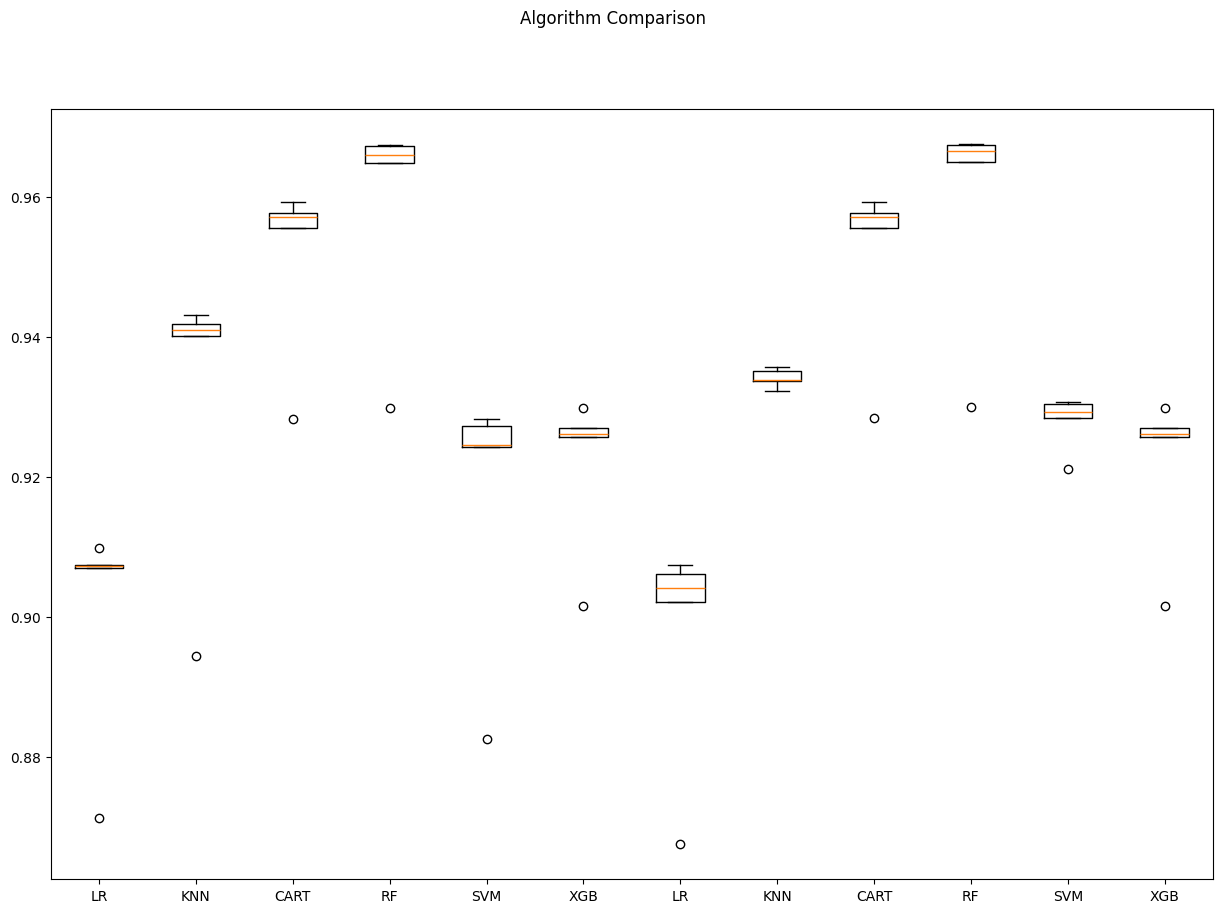

In [15]:
for name, model in models:
        kfold = KFold(n_splits = 10, shuffle=True, random_state = 12345)
        cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv = 5, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = f"{name}: Accuracy = {cv_results.mean()*100:.2f}%, Std Dev = {cv_results.std()*100:.2f}%"
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6) Model Tuning

### 1) Random Forests Tuning

In [48]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}
rf_model = RandomForestClassifier(random_state = 12345)

In [49]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


KeyboardInterrupt: 

In [ ]:
gs_cv.best_params_

NameError: name 'gs_cv' is not defined

### 1.1) Final Model Installation

In [ ]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)
rf_tuned = rf_tuned.fit(X,y)
cross_val_score(rf_tuned, X, y, cv = 10).mean()

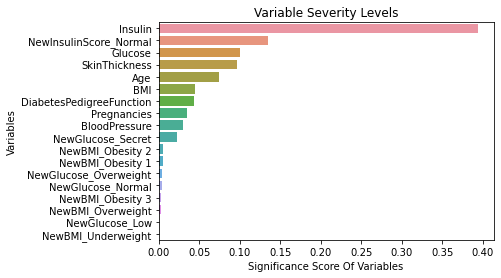

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 2) XGBoost Tuning

In [ ]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [ ]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [ ]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 43.2min finished


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

### 2.1) Final Model Installation

In [ ]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [ ]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.9013157894736843

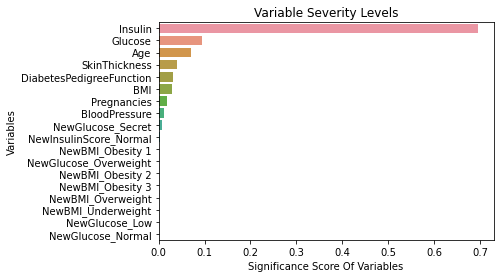

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

# 7) Comparison of Final Models

In [ ]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))

# evaluate each model in turn
results = []
names = []

RF: 0.897368 (0.034211)
XGB: 0.901316 (0.028373)
LightGBM: 0.896053 (0.033000)


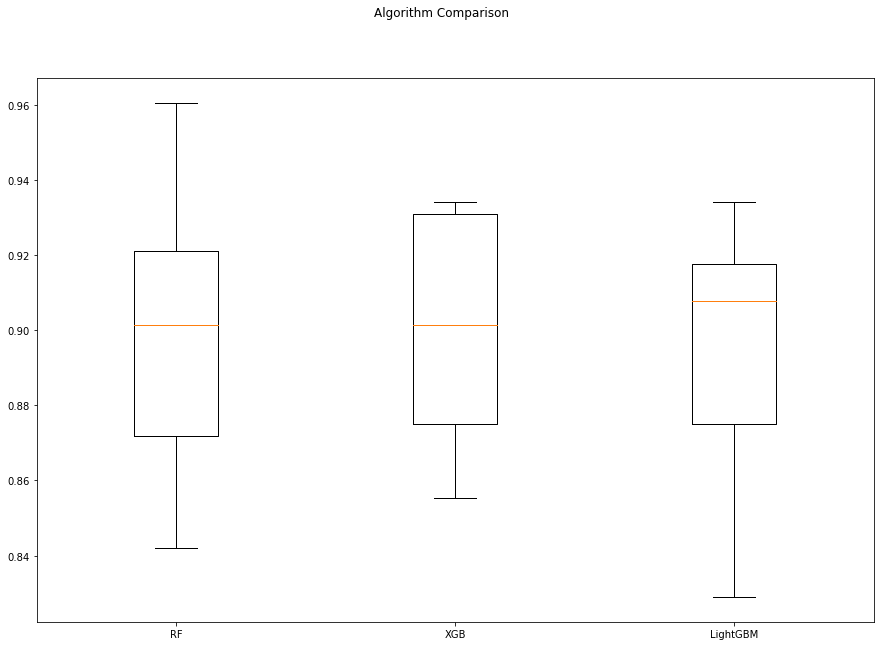

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 8) Reporting

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section;
df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building;
Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

5) Result;
The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)